People always ask: "can you randomize several times and use the proportion of selection, instead of
just one randomization"?

Let's try to figure this out.

/Users/jonathantaylor/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0.30931634915900885

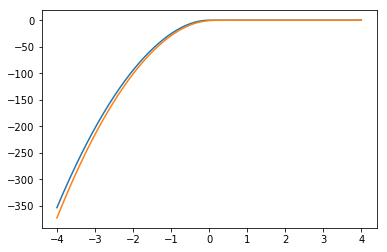

In [1]:
import numpy as np
import regreg.api as rr
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

from selection.distributions.discrete_family import discrete_family

ntries, sigma = 21, 0.5

def simulate(n=100, ntries=ntries, sigma=sigma, truth=0):
               
    while True:
        Z = np.random.standard_normal() + truth
        proportion = 0
        for _ in range(ntries):
            proportion += (Z + sigma * np.random.standard_normal() > 0)

        proportion /= ntries
        if proportion > 0.5:
            return Z

simulate()

def weight(Z, ntries=ntries, sigma=0.5):
    piZ = scipy.stats.norm.sf(-Z/sigma)
    return scipy.stats.binom.sf(ntries * 0.5, ntries, piZ)

def weight_LD(Z, ntries=ntries, sigma=0.5):
    phiZ = scipy.stats.norm.sf(-Z/sigma)
    return np.exp(-ntries * (0.5 * np.log(0.5 / phiZ) + 0.5 * np.log(0.5 / (1 - phiZ)))) * (phiZ < 0.5) + (phiZ >= 0.5)

weight(0.2)
Z = np.linspace(-4, 4, 1001)
W = [weight_LD(z) for z in Z]
W0 = [weight(z) for z in Z]
plt.plot(Z, np.log(W))
plt.plot(Z, np.log(W0))
selective_law = discrete_family(Z, W * scipy.stats.norm.pdf(Z))
selective_law0 = discrete_family(Z, W0 * scipy.stats.norm.pdf(Z))

def pivot(z, truth=0):
    return 1 - selective_law.cdf(truth, z)

def pivot0(z, truth=0):
    return 1 - selective_law0.cdf(truth, z)

pivot(simulate())


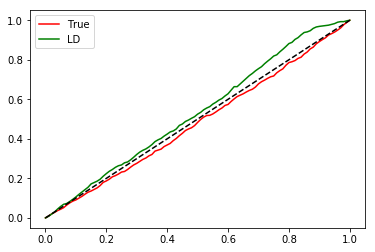

In [2]:
P0 = []

for _ in range(1000):
    P0.append((pivot(simulate()), pivot0(simulate())))
P0 = np.array(P0)
U = np.linspace(0, 1, 101)
plt.plot(U, sm.distributions.ECDF(P0[:,1])(U), 'r', label='True')
plt.plot(U, sm.distributions.ECDF(P0[:,0])(U), 'g', label='LD')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

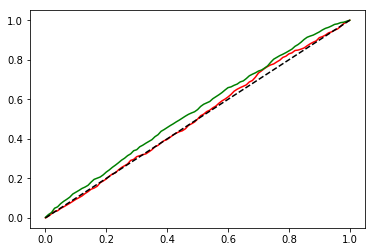

In [3]:
PA = []

for _ in range(1000):
    PA.append((pivot(simulate(truth=1), truth=1), pivot0(simulate(truth=1), truth=1)))
PA = np.array(PA)
U = np.linspace(0, 1, 101)
plt.plot(U, sm.distributions.ECDF(PA[:,1])(U), 'r', label='True')
plt.plot(U, sm.distributions.ECDF(PA[:,0])(U), 'g', label='LD')
plt.plot([0, 1], [0, 1], 'k--')

In [4]:
selective_law.equal_tailed_interval(-1)

(-62.17796362651312, -36.373928461359455)

In [5]:
Z0 = np.linspace(-2,2,501)
selective_law = discrete_family(Z, W * scipy.stats.norm.pdf(Z))

LU = []
for z in Z0:
    selective_law = discrete_family(Z, W * scipy.stats.norm.pdf(Z))
    LU.append(selective_law.equal_tailed_interval(z))
LU = np.array(LU)

LU0 = []
for z in Z0:
    selective_law = discrete_family(Z, W0 * scipy.stats.norm.pdf(Z))
    LU0.append(selective_law.equal_tailed_interval(z))
LU0 = np.array(LU0)

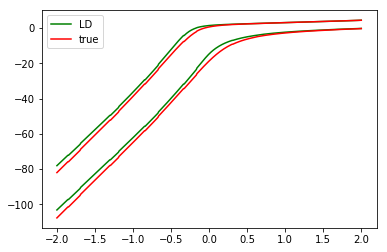

In [6]:
plt.plot(Z0, LU[:,0], 'g', label='LD')
plt.plot(Z0, LU[:,1], 'g')
plt.plot(Z0, LU0[:,0], 'r', label='true')
plt.plot(Z0, LU0[:,1], 'r')
plt.legend()

In [7]:
coverage, ncover, truth = 0, 5000, 0
lengths = []
for _ in range(ncover):
    z = simulate(truth=truth)
    selective_law = discrete_family(Z, W * scipy.stats.norm.pdf(Z))
    L, U = selective_law.equal_tailed_interval(z)
    coverage += (L < truth) * (U > truth)
    lengths.append(U-L)
    
coverage / ncover, np.mean(lengths), np.std(lengths)

(0.969, 7.724322622276787, 3.6284698568799683)

In [8]:
coverage, ncover, truth = 0, 5000, 0.5
lengths = []
for _ in range(ncover):
    z = simulate(truth=truth)
    selective_law = discrete_family(Z, W * scipy.stats.norm.pdf(Z))
    L, U = selective_law.equal_tailed_interval(z)
    coverage += (L < truth) * (U > truth)
    lengths.append(U-L)
    
coverage / ncover, np.mean(lengths), np.std(lengths)

/Users/jonathantaylor/git-repos/selection/selection/distributions/discrete_family.py:108: RuntimeWarning: overflow encountered in exp
  self._partition *= np.exp(_largest)
/Users/jonathantaylor/git-repos/selection/selection/distributions/discrete_family.py:104: RuntimeWarning: overflow encountered in subtract
  _exp_thetaX = np.exp(_thetaX - _largest)
/Users/jonathantaylor/git-repos/selection/selection/distributions/discrete_family.py:102: RuntimeWarning: overflow encountered in multiply
  _thetaX = _theta * self.sufficient_stat + self._lw
/Users/jonathantaylor/git-repos/selection/selection/distributions/discrete_family.py:104: RuntimeWarning: invalid value encountered in subtract
  _exp_thetaX = np.exp(_thetaX - _largest)


(0.9646, 6.980869184197236, 3.2457636168194024)

In [9]:
coverage, ncover, truth = 0, 5000, 1.
lengths = []
for _ in range(ncover):
    z = simulate(truth=truth)
    selective_law = discrete_family(Z, W * scipy.stats.norm.pdf(Z))
    L, U = selective_law.equal_tailed_interval(z)
    coverage += (L < truth) * (U > truth)
    lengths.append(U-L)
    
coverage / ncover, np.mean(lengths), np.std(lengths)

/Users/jonathantaylor/git-repos/selection/selection/distributions/discrete_family.py:108: RuntimeWarning: overflow encountered in exp
  self._partition *= np.exp(_largest)
/Users/jonathantaylor/git-repos/selection/selection/distributions/discrete_family.py:104: RuntimeWarning: overflow encountered in subtract
  _exp_thetaX = np.exp(_thetaX - _largest)
/Users/jonathantaylor/git-repos/selection/selection/distributions/discrete_family.py:102: RuntimeWarning: overflow encountered in multiply
  _thetaX = _theta * self.sufficient_stat + self._lw
/Users/jonathantaylor/git-repos/selection/selection/distributions/discrete_family.py:104: RuntimeWarning: invalid value encountered in subtract
  _exp_thetaX = np.exp(_thetaX - _largest)


(0.958, 6.298879226571981, 2.7521351847955073)

# Gaussian noise added intervals

In [10]:
Z = np.linspace(-5,5,2001)
W = scipy.stats.norm.sf(-Z/0.28) * scipy.stats.norm.pdf(Z)

In [11]:
LU = []
Z0 = np.linspace(-4,2,501)
for z in Z0:
    selective_law = discrete_family(Z, W)
    LU.append(selective_law.equal_tailed_interval(z))
LU = np.array(LU)

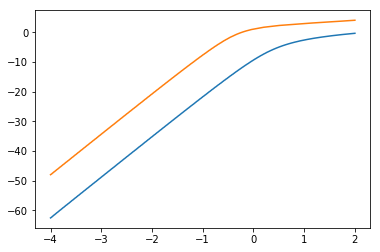

In [12]:
plt.plot(Z0, LU[:,0])
plt.plot(Z0, LU[:,1])

# Increasing number of tries

In [19]:
ntries, sigma = 11, 1
Z = np.linspace(-4, 4, 1001)
W = [weight_LD(z, ntries=ntries, sigma=sigma) for z in Z]
W0 = [weight(z, ntries=ntries, sigma=sigma) for z in Z]
selective_law = discrete_family(Z, W * scipy.stats.norm.pdf(Z))
selective_law0 = discrete_family(Z, W0 * scipy.stats.norm.pdf(Z))

def pivot(z, truth=0):
    return 1 - selective_law.cdf(truth, z)

def pivot(z, truth=0):
    return 1 - selective_law0.cdf(truth, z)

pivot(simulate())


0.28179732794246737

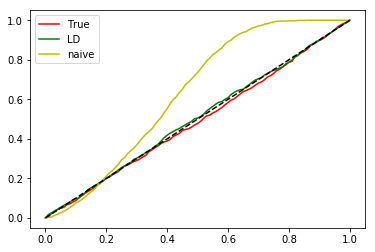

In [20]:
P0 = []

for _ in range(1000):
    P0.append((pivot(simulate(ntries=ntries, sigma=sigma)), 
               pivot0(simulate(ntries=ntries, sigma=sigma)),
              1-scipy.stats.norm.cdf(simulate(ntries=ntries, sigma=sigma, truth=truth))))
P0 = np.array(P0)
U = np.linspace(0, 1, 101)
plt.plot(U, sm.distributions.ECDF(P0[:,1])(U), 'r', label='True')
plt.plot(U, sm.distributions.ECDF(P0[:,0])(U), 'g', label='LD')
plt.plot(U, sm.distributions.ECDF(P0[:,2])(U), 'y', label='naive')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

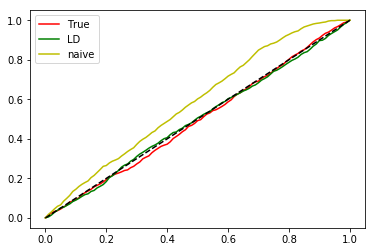

In [21]:
PA = []
truth = 1
for _ in range(1000):
    PA.append((pivot(simulate(ntries=ntries, sigma=sigma, truth=truth), truth=truth), 
               pivot0(simulate(ntries=ntries, sigma=sigma, truth=truth), truth=truth),
              1-scipy.stats.norm.cdf(simulate(ntries=ntries, sigma=sigma, truth=truth) - truth)))
PA = np.array(PA)
U = np.linspace(0, 1, 101)
plt.plot(U, sm.distributions.ECDF(PA[:,1])(U), 'r', label='True')
plt.plot(U, sm.distributions.ECDF(PA[:,0])(U), 'g', label='LD')
plt.plot(U, sm.distributions.ECDF(PA[:,2])(U), 'y', label='naive')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

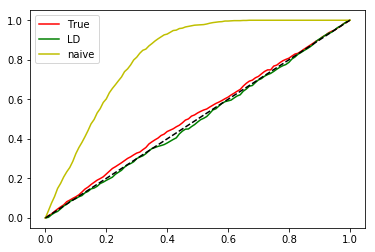

In [22]:
PA = []
truth = -0.5
for _ in range(1000):
    PA.append((pivot(simulate(ntries=ntries, sigma=sigma, truth=truth), truth=truth), 
               pivot0(simulate(ntries=ntries, sigma=sigma, truth=truth), truth=truth),
              1-scipy.stats.norm.cdf(simulate(ntries=ntries, sigma=sigma, truth=truth) - truth)))
PA = np.array(PA)
U = np.linspace(0, 1, 101)
plt.plot(U, sm.distributions.ECDF(PA[:,1])(U), 'r', label='True')
plt.plot(U, sm.distributions.ECDF(PA[:,0])(U), 'g', label='LD')
plt.plot(U, sm.distributions.ECDF(PA[:,2])(U), 'y', label='naive')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

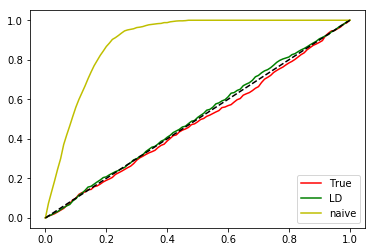

In [23]:
PA = []
truth = -1
for _ in range(1000):
    PA.append((pivot(simulate(ntries=ntries, sigma=sigma, truth=truth), truth=truth), 
               pivot0(simulate(ntries=ntries, sigma=sigma, truth=truth), truth=truth),
              1-scipy.stats.norm.cdf(simulate(ntries=ntries, sigma=sigma, truth=truth) - truth)))
PA = np.array(PA)
U = np.linspace(0, 1, 101)
plt.plot(U, sm.distributions.ECDF(PA[:,1])(U), 'r', label='True')
plt.plot(U, sm.distributions.ECDF(PA[:,0])(U), 'g', label='LD')
plt.plot(U, sm.distributions.ECDF(PA[:,2])(U), 'y', label='naive')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

## 